In [42]:
import numpy as np
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [10]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [11]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [14]:
iris['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [15]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(iris['data'],iris['target'],random_state=0)

In [24]:
X_train.shape

(112, 4)

In [25]:
X_test.shape

(38, 4)

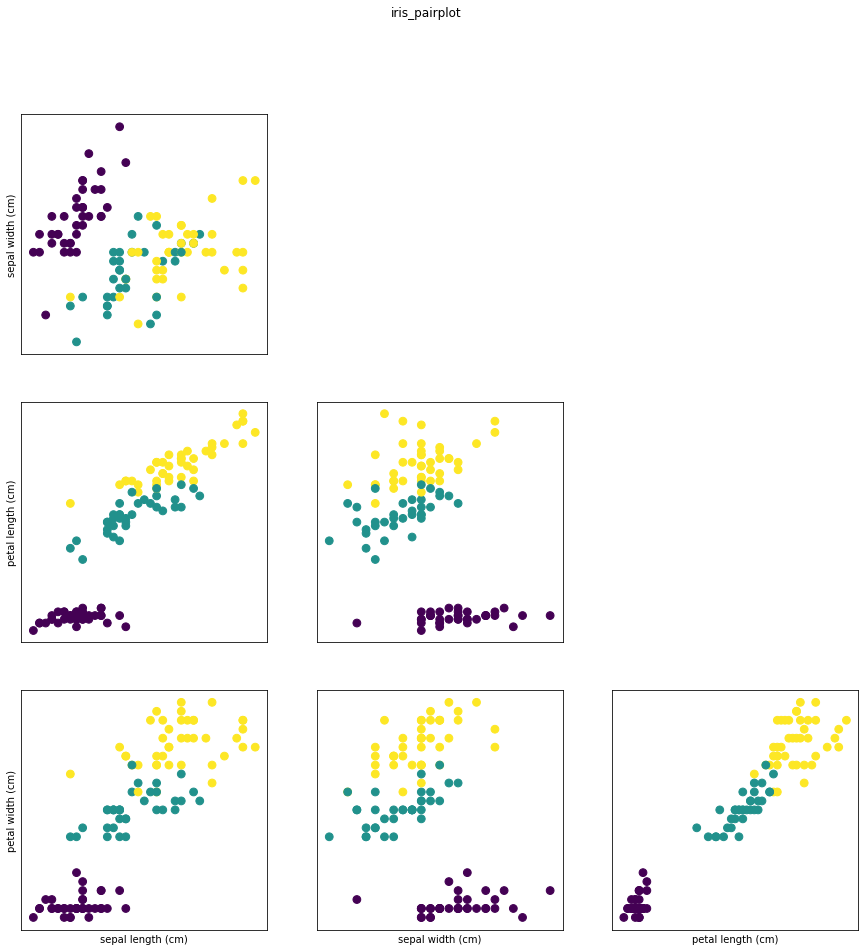

In [36]:
import matplotlib.pyplot as plt
% matplotlib inline
fig,ax = plt.subplots(3,3,figsize=(15,15))
plt.suptitle('iris_pairplot')
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j],X_train[:,i+1],c=y_train,s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        if i == 2:
            ax[i,j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i,j].set_ylabel(iris['feature_names'][i+1])
        if j > i:
            ax[i,j].set_visible(False)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [48]:
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                    metric_params = None,n_jobs=1,n_neighbors=1,p=2
                    )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [43]:
X_new = np.array([[5, 2.9 ,1 ,0.2]])
X_new.shape

(1, 4)

In [44]:
prediction = knn.predict(X_new)

In [45]:
prediction

array([0])

In [49]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.97368421052631582

In [50]:
knn.score(X_test,y_test)

0.97368421052631582